In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:/Users/Admin/Desktop/Country-data.csv")

In [2]:
data.shape

(167, 10)

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicates found.


In [6]:
# Add some duplicate rows
data = pd.concat([data, data.iloc[0:5]], ignore_index=True)
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

Duplicate rows found:
                 country  child_mort  exports  health  imports  income  \
167          Afghanistan        90.2     10.0    7.58     44.9    1610   
168              Albania        16.6     28.0    6.55     48.6    9930   
169              Algeria        27.3     38.4    4.17     31.4   12900   
170               Angola       119.0     62.3    2.85     42.9    5900   
171  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

     inflation  life_expec  total_fer   gdpp  
167       9.44        56.2       5.82    553  
168       4.49        76.3       1.65   4090  
169      16.10        76.5       2.89   4460  
170      22.40        60.1       6.16   3530  
171       1.44        76.8       2.13  12200  


In [7]:
data = data.drop_duplicates()
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicates found.


In [8]:
null_values = data.isna().sum()
if null_values.sum() == 0:
    print("No NaN or null values found in the dataset.")
else:
    print("NaN or null values found in the dataset:")
    print(null_values)

No NaN or null values found in the dataset.


In [10]:
# New rows to be added
new_rows = {
    'income': [None, None, None],
    'inflation': [np.nan, np.nan, np.nan]
}
# Convert to DataFrame
new_df = pd.DataFrame(new_rows)
# Append new rows to the DataFrame
data = pd.concat([data, new_df], ignore_index=True)
print(data)


                 country  child_mort  exports  health  imports income  \
0            Afghanistan        90.2     10.0    7.58     44.9   1610   
1                Albania        16.6     28.0    6.55     48.6   9930   
2                Algeria        27.3     38.4    4.17     31.4  12900   
3                 Angola       119.0     62.3    2.85     42.9   5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9  19100   
..                   ...         ...      ...     ...      ...    ...   
165                Yemen        56.3     30.0    5.18     34.4   4480   
166               Zambia        83.1     37.0    5.89     30.9   3280   
167                  NaN         NaN      NaN     NaN      NaN   None   
168                  NaN         NaN      NaN     NaN      NaN   None   
169                  NaN         NaN      NaN     NaN      NaN   None   

     inflation  life_expec  total_fer     gdpp  
0         9.44        56.2       5.82    553.0  
1         4.49        76.

In [11]:
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder objects
country_encoder = LabelEncoder()
# Fit and transform the 'country' column
country_encoded = country_encoder.fit_transform(data['country'])
# Replace the original 'country' column with the encoded values
data['country'] = country_encoded
print(data.head)

<bound method NDFrame.head of      country  child_mort  exports  health  imports income  inflation  \
0          0        90.2     10.0    7.58     44.9   1610       9.44   
1          1        16.6     28.0    6.55     48.6   9930       4.49   
2          2        27.3     38.4    4.17     31.4  12900      16.10   
3          3       119.0     62.3    2.85     42.9   5900      22.40   
4          4        10.3     45.5    6.03     58.9  19100       1.44   
..       ...         ...      ...     ...      ...    ...        ...   
165      165        56.3     30.0    5.18     34.4   4480      23.60   
166      166        83.1     37.0    5.89     30.9   3280      14.00   
167      167         NaN      NaN     NaN      NaN   None        NaN   
168      167         NaN      NaN     NaN      NaN   None        NaN   
169      167         NaN      NaN     NaN      NaN   None        NaN   

     life_expec  total_fer     gdpp  
0          56.2       5.82    553.0  
1          76.3       1.65   

In [12]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

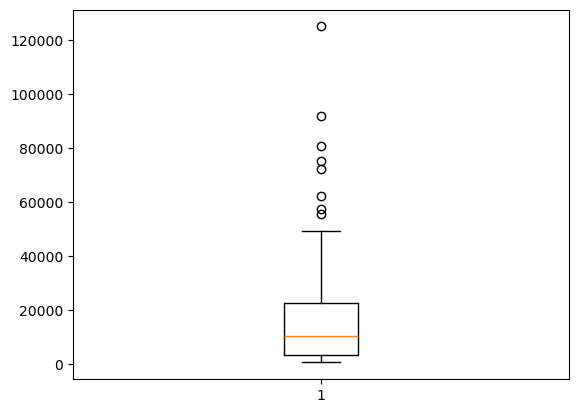

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['income'])
plt.show()

In [14]:
income_col_df = pd.DataFrame(data['income'])
income_median = income_col_df.median()
#getting IQR of Age column
Q3 = income_col_df.quantile(q=0.75)
Q1 = income_col_df.quantile(q=0.25)
IQR = Q3-Q1
#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)
#Finding and treating outliers - both lower and upper end
data.loc[data['income']>IQR_UL , 'income'] = int(income_col_df.quantile(q=0.90))
data.loc[data['income']<IQR_LL , 'income'] = int(income_col_df.quantile(q=0.01))

C:\Users\Admin\AppData\Local\Temp\ipykernel_12896\3093681524.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12896\3093681524.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12896\3093681524.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['income']>IQR_UL , 'income'] = int(income_col_df.quantile(q=0.90))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12896\3093681524.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.loc[data['income']<IQR_LL 

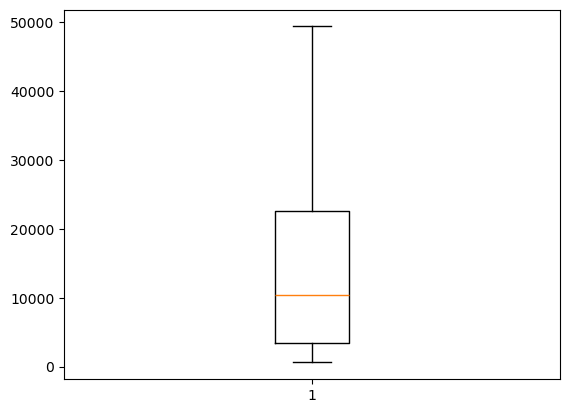

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(data['income'])
plt.show()

In [16]:
X = data.iloc[:, [5,6]].values
X[0]
X[1]

from sklearn.cluster import KMeans
list1 = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(X)
    list1.append(Kmeans.inertia_)
    print(list1)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838, 641283092.7127041]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838, 641283092.7127041, 499460158.9159651]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838, 641283092.7127041, 499460158.9159651, 361381526.02495444]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838, 641283092.7127041, 499460158.9159651, 361381526.02495444, 262319207.86411923]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[33042170784.31826, 7132280012.647079, 2726919486.998007, 1587432861.7216258, 878372382.461838, 641283092.7127041, 499460158.9159651, 361381526.02495444, 262319207.86411923, 211949087.39135882]


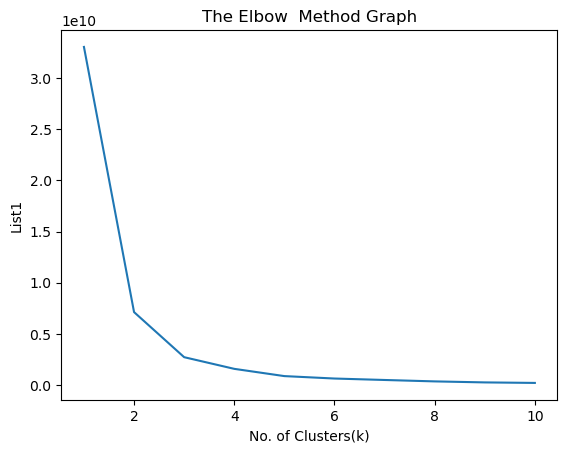

In [17]:
plt.plot(range(1, 11), list1)
plt.title('The Elbow  Method Graph')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('List1')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit(X)
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = y_kmeans.labels_
print(labels)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 0 2 0 0 2 1 1 0 0 1 2 0 0 1 2 2 2 2 2 0 0 1 0 2 2 2 2 1 2 2 2 0 2 0 2
 2 2 0 2 0 1 1 1 0 2 2 2 1 2 0 2 1 1 0 2 2 1 2 1 0 2 2 2 2 2 0 1 2 2 0 0 1
 1 1 2 1 2 0 2 2 1 2 2 0 0 2 2 1 0 1 0 2 2 0 2 2 1 2 0 2 2 2 0 2 2 2 2 2 1
 1 2 2 1 1 2 0 2 2 2 0 0 1 0 0 2 2 1 2 0 0 2 1 0 1 2 0 1 1 2 2 2 0 1 1 2 2
 0 2 2 2 2 0 2 2 2 1 1 1 0 2 2 0 2 2 2 0 0 0]


In [19]:
#Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
metrics.silhouette_score(X, labels, metric='euclidean')

0.6484767698001436

In [20]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 0 2 0 0 2 1 1 0 0 1 2 0 0 1 2 2 2 2 2 0 0 1 0 2 2 2 2 1 2 2 2 0 2 0 2
 2 2 0 2 0 1 1 1 0 2 2 2 1 2 0 2 1 1 0 2 2 1 2 1 0 2 2 2 2 2 0 1 2 2 0 0 1
 1 1 2 1 2 0 2 2 1 2 2 0 0 2 2 1 0 1 0 2 2 0 2 2 1 2 0 2 2 2 0 2 2 2 2 2 1
 1 2 2 1 1 2 0 2 2 2 0 0 1 0 0 2 2 1 2 0 0 2 1 0 1 2 0 1 1 2 2 2 0 1 1 2 2
 0 2 2 2 2 0 2 2 2 1 1 1 0 2 2 0 2 2 2 0 0 0]


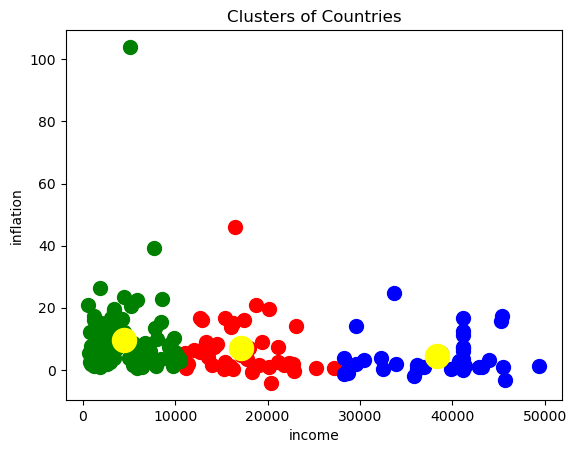

In [21]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Countries')
plt.xlabel('income')
plt.ylabel('inflation')
plt.show()

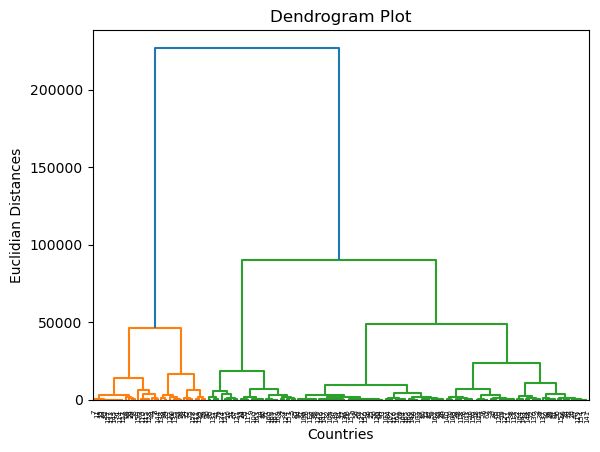

In [22]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(X, method="ward"))
plt.title("Dendrogram Plot")
plt.ylabel("Euclidian Distances")
plt.xlabel("Countries")
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_kmeans = hc.fit(X)
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.6058331935967575

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


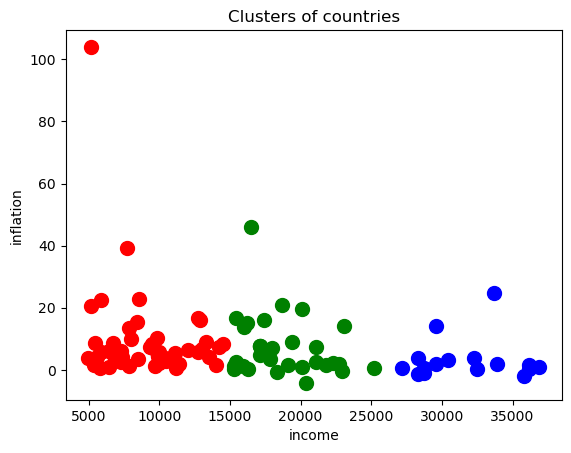

In [24]:
#visualizing the clusters
y_kmeans = hc.fit_predict(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.title('Clusters of countries')
plt.xlabel('income')
plt.ylabel('inflation')
plt.show()